# Linear Regression

A linear regression is a procedure that allows you to find the linear equation that best represents the relationship between variables. That is, it finds the line (or plane, in higher dimensions) of best fit. For instance, if you want to know how the returns on the S&P 500 (data points $X_1, X_2,\ldots, X_n$) affect the price of a stock ($Y_1, Y_2,\ldots, Y_n$), you can find the line of best fit for the set of points with coordinates (S&P 500 returns, stock price). If this line is, say, $y = 5x + 3$, you know that for every dollar that S&P 500 returns go up, the stock price goes up by \$5.

We can quantify "best fit" as the parameters $a, b$ that minimize the sum of squared errors,
$$\sum_{i=1}^n (Y_i - a - bX_i)^2$$
There other metrics by which to determine the quality of a fit, and so this particular one is referred to as OLS (ordinary least squares) regression.

Python's `statsmodels` library has a built-in linear fit function. Note that this will give a line of best fit; whether or not the relationship it shows is significant is for you to determine. The output will also have some statistics about the model, such as R-squared and the F value, which may help you quantify how good the fit actually is. Below we will see an example of two variables $X$ and $Y$ which are completely uncorrelated, and do not have a linear relationship at all.

In [2]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

[2015-06-12 16:44:09.339634] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:44:09.340318] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:44:09.340855] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:44:09.341412] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:44:09.342459] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:44:09.342991] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:44:09.343591] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:44:09.344093] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:44:09.344600] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:44:09.345097] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3861
Date:                Fri, 12 Jun 2015   Prob (F-statistic):              0.536
Time:                        16:44:09   Log-Likelihood:                -10.794
No. Observations:                 100   AIC:                             25.59
Df Residuals:                      98   BIC:                             30.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4774      0.051      9.445      0.000         0.377     0.578
x1             0.0559      0.090      0.621      0.536        -0.123     0.234
==============================================================================
Omnibus:                       17.457   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.796
Skew:                          -0.112   Prob(JB):                       0.0909
Kurtosis:                       1.951   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

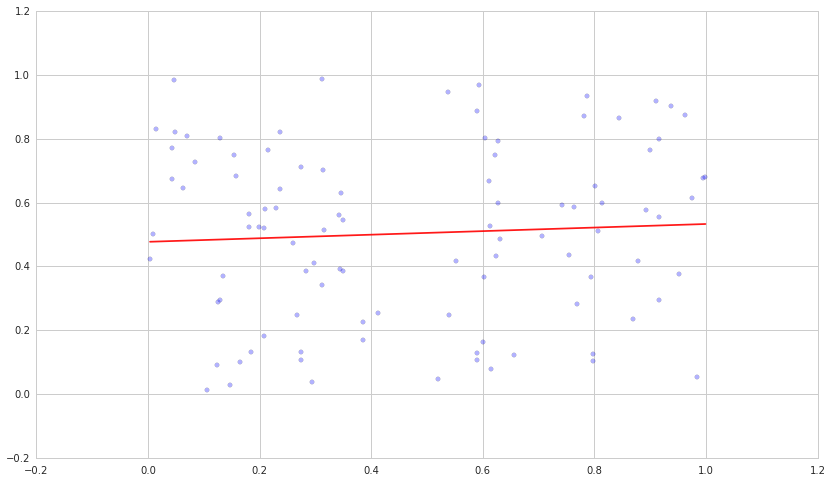

In [15]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    return model.summary()

xs = np.random.rand(100)
linreg(xs,np.random.rand(100))

The above is clearly not a good representation of the relationship between the variables. Now we can take a look at two variables which are indeed correlated:

[2015-06-12 16:47:02.005751] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.006523] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.007050] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.007590] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.008604] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.009123] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.009707] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.010199] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.010728] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.011338] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     328.8
Date:                Fri, 12 Jun 2015   Prob (F-statistic):           4.46e-33
Time:                        16:47:02   Log-Likelihood:                 26.670
No. Observations:                 100   AIC:                            -49.34
Df Residuals:                      98   BIC:                            -44.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0476      0.035     -1.370      0.174        -0.117     0.021
x1             1.1209      0.062     18.133      0.000         0.998     1.244
==============================================================================
Omnibus:                        3.364   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.921
Skew:                           0.321   Prob(JB):                        0.232
Kurtosis:                       2.463   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

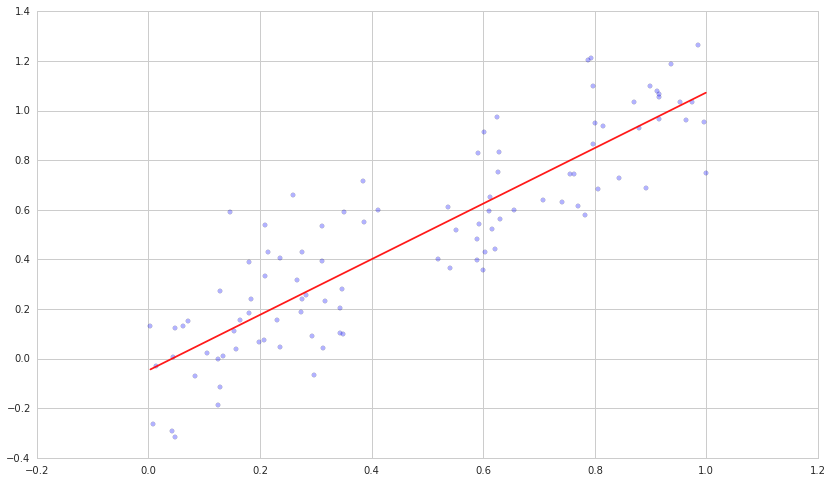

In [18]:
# Generate ys correlated with xs by adding normally-destributed errors
ys = xs + 0.2*np.random.randn(100)

linreg(xs,ys)

In a situation like the above, the line of best fit does indeed model the dependent variable Y quite well (with a high $R^2$ value).

For our last example, we'll compare the price of Tesla Motors stock to the S&P 500:

[2015-06-12 16:43:48.660985] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.661777] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.662309] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.662885] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.663902] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.664445] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.665047] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.665548] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.666042] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.666571] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     63.14
Date:                Fri, 12 Jun 2015   Prob (F-statistic):           6.66e-14
Time:                        16:43:48   Log-Likelihood:                 548.81
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0011      0.002      0.626      0.532        -0.002     0.004
x1             1.9271      0.243      7.946      0.000         1.449     2.405
==============================================================================
Omnibus:                       63.947   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.184
Skew:                           0.850   Prob(JB):                     2.50e-81
Kurtosis:                       8.710   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

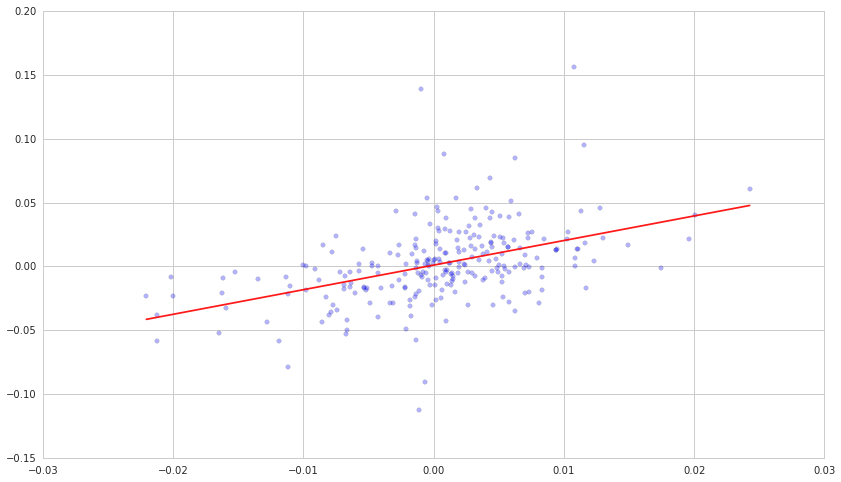

In [14]:
start = '2014-01-01'
end = '2015-01-01'
asset = get_pricing('TSLA', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)